<a href="https://colab.research.google.com/github/Ajay-Sai-Kiran/Machine_learning_challenge/blob/main/Day_II_of_Machine_Learning%5BLogistic_Regression%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression with coding

#Probabilities and Odd

Consider a dichotomous variable,Y,which is scored 1 if a person says he or she will vote for a given piece of legislation and 0 if the person says he or she will not.

For a population of individuals,the mean of Y is denoted by μ.This mean equals the proportion of individuals who have a score 1(i.e; the proportion of individuals who say they will vote for the legislation).

It also represents the probability that an individual from the population will vote for legislation [i.e; μ=P(Y=1)].

If μ=0.67 or stated another way,about two thirds of the population favor the legislation.

Although a probability is one useful statistics for characterizing this scenario,an alternative approach uses the concept of odds instead of probability.

if P is the probability of an event,then the odds of that event are

Odds=P/(1-P)

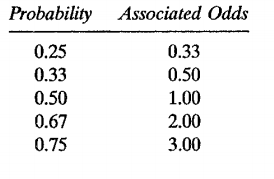

An odds of 0.33 means that the probability of voting for the legislation is one third of the probability of not voting for it.

An odds of 1.00 means that the probability of voting is the same as the probability of not voting.

An odds of 3.00 means the probability of voting for the legislation is 3 times larger than the probability of not voting for it.

Note that for a dichotomous variable with score 1 and 0, the odds of a score of 1 is
**μ/(1-μ)**, because μ is the probability of a score of 1.

Just as a probability can ve converted to an odds,so can an odds be converted to a probability 


    Probability = odd/(1+odds)

#Why use Odds Ratios in Logistic Regression

The problem is that probability and odds have different properties that give odds some advantages in statistics. For example, in logistic regression the odds ratio represents the constant effect of a predictor X, on the likelihood that one outcome will occur.



The key phrase here is **constant effect**. In regression models, we often want a **measure of the unique effect** of each X on Y. If we try to express the effect of X on the likelihood of a categorical Y having a specific value through probability, **the effect is not constant.**

What that means is there is no way to express in one number how X affects Y in terms of probability. The effect of X on the probability of Y has different values depending on the value of X.

So while we would love to use probabilities because they’re intuitive, you’re just not going to be able to describe that effect in a single number.  So if you need to communicate that effect to a research audience, you’re going to have to wrap your head around odds ratios.

#Odds and Odds ratio with code for better explanation 
[credit:https://towardsdatascience.com/logit-of-logistic-regression-understanding-the-fundamentals-f384152a33d1]

We will consider a data-set that tells us about depending on the gender, whether a customer will purchase a product or not.

In [ ]:
import pandas as pd
gender_df = pd.read_csv('/content/gender_purchase.csv')
gender_df.head(3)

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No


We will create a table of frequency of ‘yes’ and ‘no’ depending on the gender, using crosstab feature of pandas. The table will be of great use to understand odds and odds ratio later on.

In [ ]:
table = pd.crosstab(gender_df['Gender'], gender_df['Purchase'])
table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


We’re now ready to define Odds, which describes the ratio of success to ratio of failure. 

Considering females group, we see that probability that a female will purchase (success) the product is = **159/265 (yes/total number of females).**

Probability of failure (no purchase) for female is 106/265. In this case the odds is defined as **(159/265)/(106/265) = 1.5.**

Higher the odds, better is the chance for success. Range of odds can be any number between [0 , ∞]. What happens to the range if we take a natural logarithm of such numbers ? log(x) is defined for x≥0 but the range varies from [-∞, ∞].

Let’s describe Odds ratio, which as the name suggests, is the ratio of odds. Considering the example above, Odds ratio, represents which group (male/female) has better odds of success, and it’s given by calculating the ratio of odds for each group. 


So odds ratio for females= odds of successful purchase by female / odds of successful purchase by male = (159/106)/(121/125). Odds ratio for males will be the reciprocal of the above number.


We can appreciate clearly that while odds ratio can vary between 0 to positive infinity, log (odds ratio) will vary between [-∞, ∞]. Specifically when odds ratio lies between [0,1], log (odds ratio) is negative.

#Linear to Logistic Regression

Since confusingly the ‘regression’ term is present in logistic regression,we can spend some time in getting cleat understanding.

Regression usually refers to continuity i.e. predicting **continuous variables** (medicine price, taxi fare etc.) depending upon features. 

However, logistic regression is about predicting **binary variables i.e when the target variable is categorical.**




In linear regression where feature variables can take any values, the output (label) can thus be continuous from negative to positive infinity.

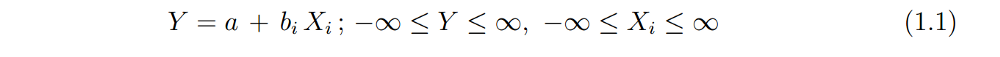

Since logistic regression is about classification, i.e Y is a categorical variable. It’s clearly not possible to achieve such output with linear regression model (eq. 1.1), since the range on both sides do not match. Our aim is to transform the LHS in such a way that it matches the range of RHS, which is governed by the range of feature variables, [-∞, ∞].

For **linear regression,both X and Y ranges from minus infinity to positive infinity.**

**Y in logistic is categorical, or for the problem above it takes either of the two distinct values 0,1.** First, we try to predict probability using the regression model. 

Instead of two distinct values now the LHS can take any values from 0 to 1 but still the ranges differ from the RHS.

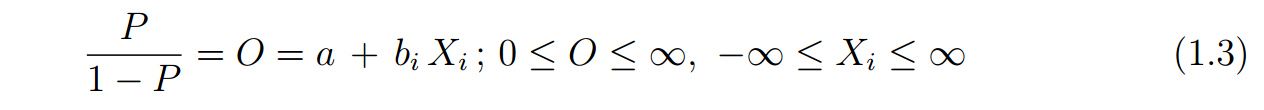

As discussed above that odds and odds ratio ratio varies from [0, ∞]. This is better than probability (which is limited between 0 and 1) and one step closer to match the range of RHS.

Many of you have already understood that if we now consider a natural logarithm on LHS of (eq. 1.3) then the ranges on both side matches.

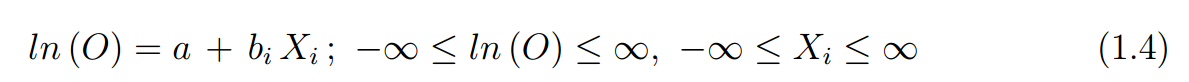

With this, we have achieved a regression model, where the output is natural logarithm of the odds , also known as logit. The base of the logarithm is not important but taking logarithm of odds is.

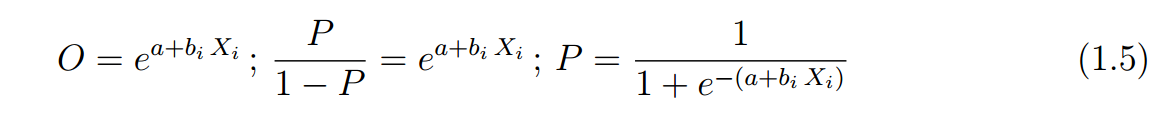

The aim of logistic regression is to predict some unknown probability P for a successful event, for any given linear combination of independent variables (features). 

Recall that binomial distribution which is the probability distribution of having n success out of **N** trials, given that each **trial is true with probability P** and **false with probability Q=1-P.**


 Bernoulli distribution on the other hand is a discrete distribution with two possible outcomes labelled by n=0 and n=1, in which n=1 (successful event) occurs with probability P and failure i.e. n=0 occurs with a probability 1-P. 


 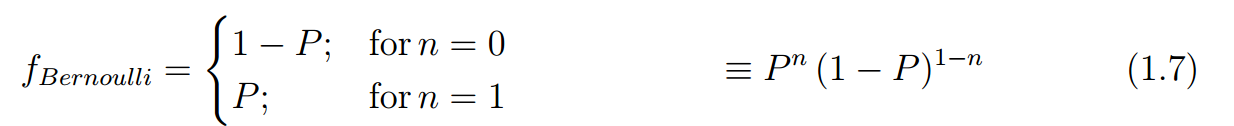

Most importantly we see that the dependent variable in logistic regression follows Bernoulli distribution having an unknown probability P. Therefore, the logit i.e. log of odds, links the independent variables (Xs) to the Bernoulli distribution

#Representation in a code 

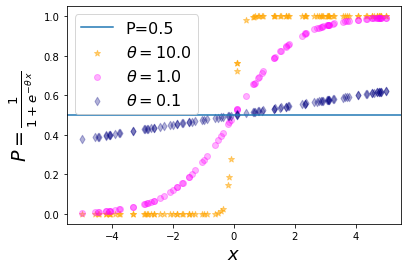

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt


random1=[]
random2=[]
random3=[]
xlist = []
theta=[10, 1,0.1]
for i in range(100):
 x = random.uniform(-5,5)
 xlist.append(x)
 logreg1 = 1/(1+math.exp(-(theta[0]*x)))
 logreg2 = 1/(1+math.exp(-(theta[1]*x)))
 logreg3 = 1/(1+math.exp(-(theta[2]*x)))
 random1.append(logreg1)
 random2.append(logreg2)
 random3.append(logreg3)
plt.scatter(xlist, random1, marker='*',s=40, c='orange',alpha=0.5,label=r'$\theta = %3.1f$'%(theta[0]))
plt.scatter(xlist, random2, c='magenta',alpha=0.3,label=r'$\theta = %3.1f$'%(theta[1]))
plt.scatter(xlist, random3, c='navy',marker='d', alpha=0.3,label=r'$\theta = %3.1f$'%(theta[2]))
plt.axhline(y=0.5, label='P=0.5')
plt.ylabel(r'$P=\frac{1}{1+e^{-\theta \, x}}$', fontsize=19)
plt.xlabel(r'$x$',fontsize=18)
plt.legend(fontsize=16)
plt.show()

From the plot above, notice that higher the value of the coefficient (orange stars) of the independent variable (here X), better it can represent two distinct probabilities 0 and 1. For lower value of the coefficient it’s essentially a straight line, resembling a simple linear regression function.

Just like in linear regression where the constant term denotes the intercept on the Y axis (hence a shift along Y axis), here for logistic function, the constant term shifts the s curve along the X axis. The figures above should convince you that it’s indeed possible to optimize a model using logistic regression that can classify data i.e. predict 0 or 1.

#Maximum Likelihood Estimation

Credits: https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/

Maximum Likelihood Estimation, or MLE for short, is a probabilistic framework for estimating the parameters of a model.

Specifically, the choice of model and model parameters is referred to as a modeling hypothesis h, and the problem involves finding h that best explains the data X. We can, therefore, find the modeling hypothesis that maximizes the likelihood function.


**maximize sum i to n log(P(xi ; h))**

Supervised learning can be framed as a conditional probability problem of predicting the probability of the output given the input:

**P(y | X)**

As such, we can define conditional maximum likelihood estimation for supervised machine learning as follows:

**maximize sum i to n log(P(yi|xi ; h)**

Now we can replace h with our logistic regression model.

In order to use maximum likelihood, we need to assume a probability distribution. In the case of logistic regression, a Binomial probability distribution is assumed for the data sample, where each example is one outcome of a Bernoulli trial. The Bernoulli distribution has a single parameter: the probability of a successful outcome (p).

**P(y=1) = p**

**P(y=0) = 1 – p **

The expected value (mean) of the Bernoulli distribution can be calculated as follows:


mean = P(y=1) * 1 + P(y=0) * 0


Or, given p:


mean = p * 1 + (1 – p) * 0 

This calculation may seem redundant, but it provides the basis for the likelihood function for a specific input, where the probability is given by the model (yhat) and the actual label is given from the dataset.

likelihood = yhat * y + (1 – yhat) * (1 – y)


This function will always return a large probability when the model is close to the matching class value, and a small value when it is far away, for both y=0 and y=1 cases.

In [1]:
# likelihood function for Bernoulli distribution
def likelihood(y, yhat):
	return yhat * y + (1 - yhat) * (1 - y)
 
# test for y=1
y, yhat = 1, 0.9
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat)))
y, yhat = 1, 0.1
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat)))
# test for y=0
y, yhat = 0, 0.1
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat)))
y, yhat = 0, 0.9
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat)))

y=1.0, yhat=0.9, likelihood: 0.900
y=1.0, yhat=0.1, likelihood: 0.100
y=0.0, yhat=0.1, likelihood: 0.900
y=0.0, yhat=0.9, likelihood: 0.100


We can update the likelihood function using the log to transform it into a log-likelihood function:

log-likelihood = log(yhat) * y + log(1 – yhat) * (1 – y)

#Loss function for Logistic Regression

The loss function for linear regression is squared loss. The loss function for logistic regression is Log Loss, which is defined as follows:

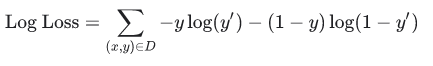

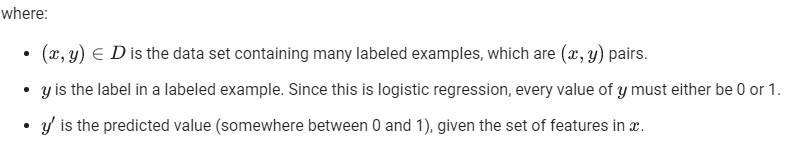

#Regularization in Logistic Regression

Regularization is extremely important in logistic regression modeling. Without regularization, the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions. Consequently, most logistic regression models use one of the following two strategies to dampen model complexity:


#L2 regularization.

#Early stopping, that is, limiting the number of training steps or the learning rate.


Imagine that you assign a unique id to each example, and map each id to its own feature. If you don't specify a regularization function, the model will become completely overfit. That's because the model would try to drive loss to zero on all examples and never get there, driving the weights for each indicator feature to +infinity or -infinity. This can happen in high dimensional data with feature crosses, when there’s a huge mass of rare crosses that happen only on one example each.

Fortunately, using L2 or early stopping will prevent this problem.

#Assumptions in Logistic Regression

1.The **true conditional probabilities** are a **logistic function of the independent variables.**


2.**No important variables are omitted.**


3.**No extraneous variables are included**.


4.**The independent variables are measured without error**.


5.**The observations are independent.**


6.**The independent variables are not linear combinations of each other.**

#Advantages and Disadvanatages of Logistic Regression


#Advantages

1.Logistic regression is **easier** to implement, interpret, and very efficient to train.

2.It can **easily extend to multiple classes**(multinomial regression) and a natural probabilistic view of class predictions.

3.It not only provides **a measure of how appropriate a predictor**(coefficient size)is, but also its **direction of association (positive or negative).**

4.Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.One may consider Regularization (L1 and L2) techniques to avoid over-fittingin these scenarios.


#Disadvantages

1.If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.

2.The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

3.It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set.

4.In Linear Regression independent and dependent variables are related linearly. But Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).

#Evaluation Metrics 

#Confusion Matrix

**Accuracy** : the proportion of the total number of predictions that were correct.


**Positive Predictive Value or Precision** : the proportion of positive cases that were correctly identified.


**Negative Predictive Value**: the proportion of negative cases that were correctly identified.


**Sensitivity or Recall **: the proportion of actual positive cases which are correctly identified.


**Specificity** : the proportion of actual negative cases which are correctly identified.

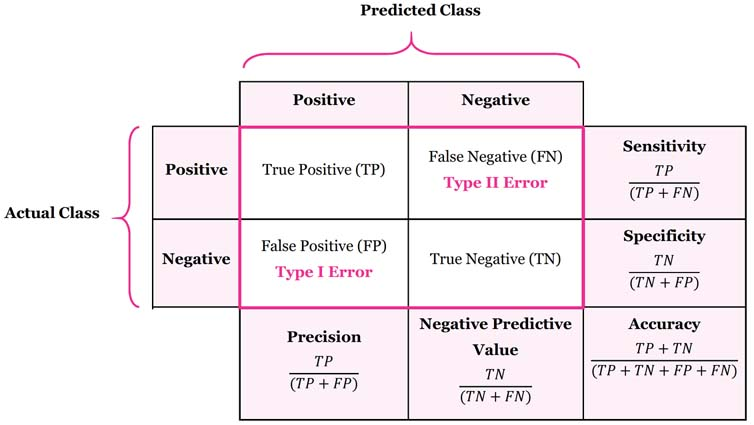

#F1 Score

F1-Score is the harmonic mean of precision and recall values for a classification problem.


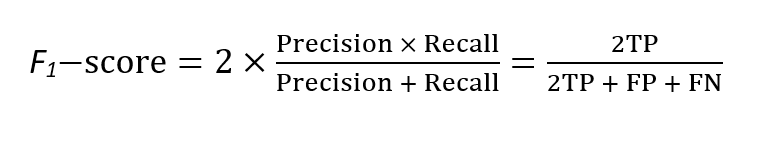

#Gain and Lift charts

Gain and Lift chart are mainly concerned to check the rank ordering of the probabilities. Here are the steps to build a Lift/Gain chart:


Step 1 : Calculate probability for each observation


Step 2 : Rank these probabilities in decreasing order.


Step 3 : Build deciles with each group having almost 10% of the observations.


Step 4 : Calculate the response rate at each deciles for Good (Responders) ,Bad (Non-responders) and total.

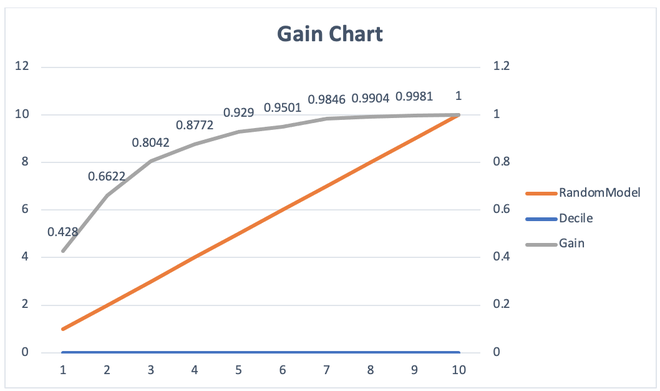

#Area Under the ROC curve (AUC – ROC)

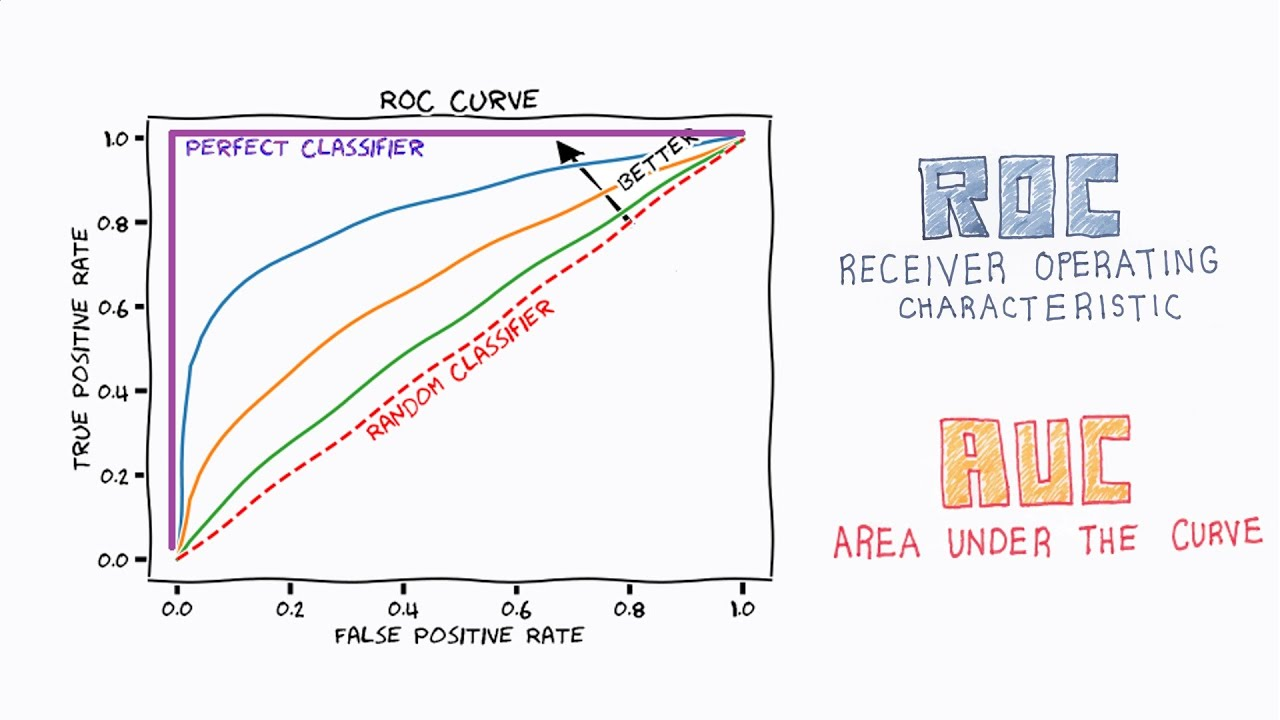

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate

False Positive Rate

An ROC curve plots **TPR vs. FPR** at **different classification thresholds**. 

Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 

The following figure shows a typical ROC curve.

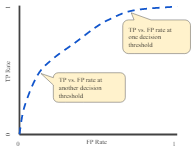

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

#AUC: Area Under the ROC Curve

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

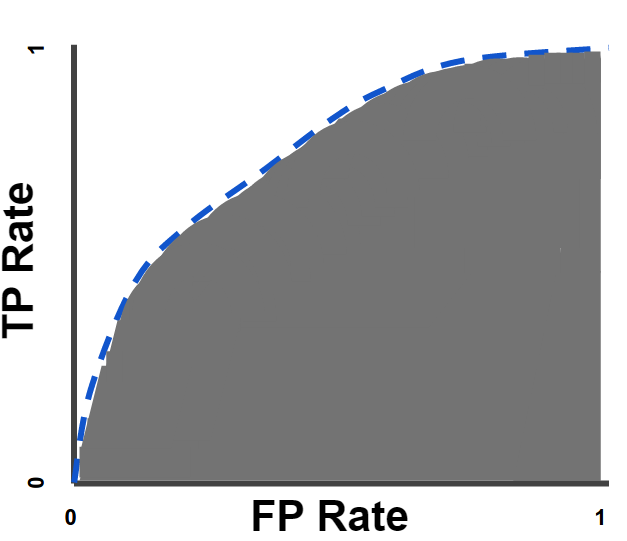

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

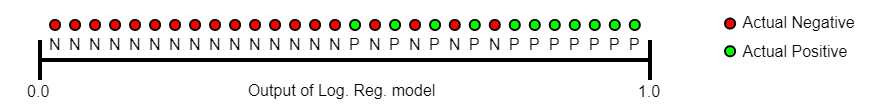

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.



AUC is desirable for the following two reasons:

AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.


However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.

#Coding

Dataset used:diabetes 

From the features we need to predict correct classification

#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [10]:
df=pd.read_csv("/content/diabetes_csv.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


There are no null values that are present

In [12]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [13]:
df.corr()

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


#OneHotEncoding 

In [15]:
from sklearn.preprocessing import OneHotEncoder
label_encode=LabelEncoder()
df["class"]=label_encode.fit_transform(df["class"])

In [16]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X=df.drop("class",axis=1)
y=df["class"]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [22]:
clf=LogisticRegression()

In [23]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred=clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


In [27]:
confusion_matrix(y_test,y_pred)

array([[144,  17],
       [ 30,  40]])

In [28]:
accuracy_score(y_test,y_pred)

0.7965367965367965

In [29]:
f1_score(y_test,y_pred)

0.6299212598425197

In [30]:
recall_score(y_test,y_pred)

0.5714285714285714

In [31]:
precision_score(y_test,y_pred)

0.7017543859649122

In [32]:

from sklearn .metrics import roc_auc_score  
 
auc = np.round(roc_auc_score(y_test, y_pred), 3) 
  
print("Auc for our sample data is {}". format(auc))

Auc for our sample data is 0.733
